<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/pca_word_cloud_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.04.05 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

#**Word Cloud for Clusters**



####**Contents:**

1. Create a DataFrame for Each Cluster<br/>
2. Functions<br/>
3. Word Cloud<br/>
4. Cluster Comparison by Weights<br/>

<br/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import os
from os import path

In [2]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
font = 'TaipeiSansTCBeta-Regular.ttf'

--2022-04-09 15:28:21--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.142.113, 74.125.142.101, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6uurml1ekba4q35irkfpqo0l77tkak3h/1649518050000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-09 15:28:24--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6uurml1ekba4q35irkfpqo0l77tkak3h/1649518050000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125.142.132

In [3]:
# !wget -O house.jpeg 'https://drive.google.com/file/d/1gv4KZOywnkQkfm3vW1qXX_0hT9l9Ub-T/view?usp=sharing'
# image = "house.jpeg"
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# mask = np.array(Image.open(path.join(d, "house.jpeg")))

In [4]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##**1. Create a DataFrame for Each Cluster**


---



In [5]:
data = pd.read_csv('/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/hierarchical_textcluster_pca.csv')
cluster_complete_3 = data[['c0101', 'content', 'cluster_complete_3']]
cluster_complete_4 = data[['c0101', 'content', 'cluster_complete_4']]
cluster_avg_3 = data[['c0101', 'content', 'cluster_avg_3']]
cluster_avg_5 = data[['c0101', 'content', 'cluster_avg_5']]
cluster_ward_3 = data[['c0101', 'content', 'cluster_ward_3']]
cluster_ward_4 = data[['c0101', 'content', 'cluster_ward_4']]

cluster_complete_3

,c0101,content,cluster_complete_3
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,鋼筋混凝土,小公設比,近一年有實價登錄...",1
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年無實價登錄,...",1
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼骨鋼筋混凝土,小公設比,近一年有實價...",1
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,...",1
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼筋混凝土,中公設比,近一年無實價登錄...",1
...,...,...,...
18191,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多...",1
18192,Y001266,"北,24小時,重點,六年至十年屋齡,多戶數,鋼筋混凝土,大公設比,近一年有實價登錄,有平面車...",1
18193,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,鋼筋混凝土,大公設比,近一年無實價登錄,有...",1
18194,Y001276,"24小時,一般,十一年至十五年屋齡,極少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多線...",1


##**2. Functions**


---



In [6]:
# Build a dataframe for a cluster 
def clusterdf(method,column,clusterID):
  return method[method[column] == clusterID]

# Extract all the contents from a cluster
def textList(cluster):
  text_list = cluster.iloc[0,1]
  for i in range(1,len(cluster.index)-1):
    text_list = text_list + ',' + cluster.iloc[i,1]
  text_list = text_list.split(',')
  return text_list

# Word cloud
def createWordCloud(dictionary):
  # mask = np.array(Image.open(image))
  # mask = imageio.imread("house.jpeg")
  # return WordCloud(margin=0, font_path=font, background_color='white').generate_from_frequencies(dictionary)
  return WordCloud(margin=0, font_path=font, background_color='white').generate_from_frequencies(dictionary)

# Show Cloud
def showWordCloud(cloud):
  plt.figure(figsize=(10, 5))
  plt.axis("off")
  plt.imshow(cloud, interpolation='bilinear')


##**3. Word Cloud**


---



###**3.1 Complete-Link Cluster**

####3 clusters

complete3_1 size:  10290
complete3_2 size:  3951
complete3_3 size:  3955


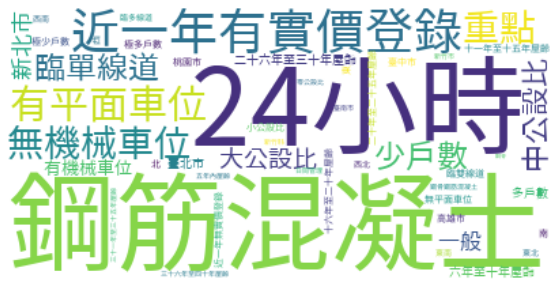

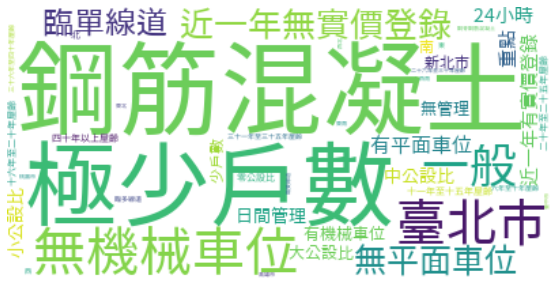

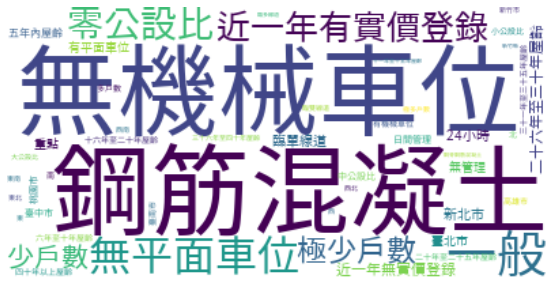

In [7]:
complete3_1 = clusterdf(cluster_complete_3,'cluster_complete_3',1)
complete3_2 = clusterdf(cluster_complete_3,'cluster_complete_3',2)
complete3_3 = clusterdf(cluster_complete_3,'cluster_complete_3',3)

# Cluster 1
print("complete3_1 size: ", len(complete3_1.index))
text_c3_1 = textList(complete3_1)
dict_c3_1 = Counter(text_c3_1)

wordcloud_c3_1 = createWordCloud(dict_c3_1)
wordcloud_c3_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_c3_1)

# Cluster 2
print("complete3_2 size: ", len(complete3_2.index))
text_c3_2 = textList(complete3_2)
dict_c3_2 = Counter(text_c3_2)

wordcloud_c3_2 = createWordCloud(dict_c3_2)
wordcloud_c3_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_c3_2)

# Cluster 3
print("complete3_3 size: ", len(complete3_3.index))
text_c3_3 = textList(complete3_3)
dict_c3_3 = Counter(text_c3_3)

wordcloud_c3_3 = createWordCloud(dict_c3_3)
wordcloud_c3_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_c3_3)


####4 clusters

complete4_1 size:  5210
complete4_2 size:  5080
complete4_3 size:  3951
complete4_4 size:  3955


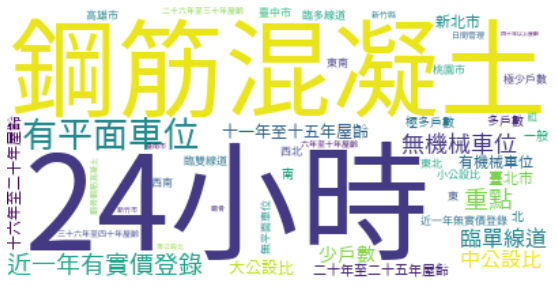

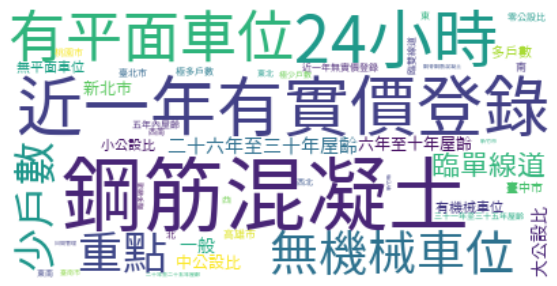

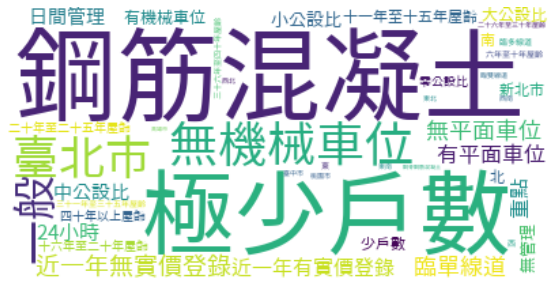

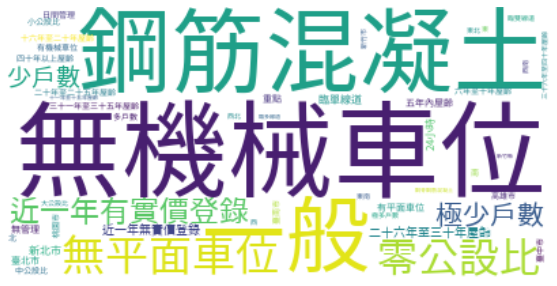

In [8]:
complete4_1 = clusterdf(cluster_complete_4,'cluster_complete_4',1)
complete4_2 = clusterdf(cluster_complete_4,'cluster_complete_4',2)
complete4_3 = clusterdf(cluster_complete_4,'cluster_complete_4',3)
complete4_4 = clusterdf(cluster_complete_4,'cluster_complete_4',4)

# Cluster 1
print("complete4_1 size: ", len(complete4_1.index))
text_c4_1 = textList(complete4_1)
dict_c4_1 = Counter(text_c4_1)

wordcloud_c4_1 = createWordCloud(dict_c4_1)
wordcloud_c4_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_c4_1)

# Cluster 2
print("complete4_2 size: ", len(complete4_2.index))
text_c4_2 = textList(complete4_2)
dict_c4_2 = Counter(text_c4_2)

wordcloud_c4_2 = createWordCloud(dict_c4_2)
wordcloud_c4_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_c4_2)

# Cluster 3
print("complete4_3 size: ", len(complete4_3.index))
text_c4_3 = textList(complete4_3)
dict_c4_3 = Counter(text_c4_3)

wordcloud_c4_3 = createWordCloud(dict_c4_3)
wordcloud_c4_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_c4_3)

# Cluster 4
print("complete4_4 size: ", len(complete4_4.index))
text_c4_4 = textList(complete4_4)
dict_c4_4 = Counter(text_c4_4)

wordcloud_c4_4 = createWordCloud(dict_c4_4)
wordcloud_c4_4.words_ # check all the words with associated weights
showWordCloud(wordcloud_c4_4)

###**3.2 Group Average Cluster**

####3 clusters

avg3_1 size:  10412
avg3_2 size:  2274
avg3_3 size:  5510


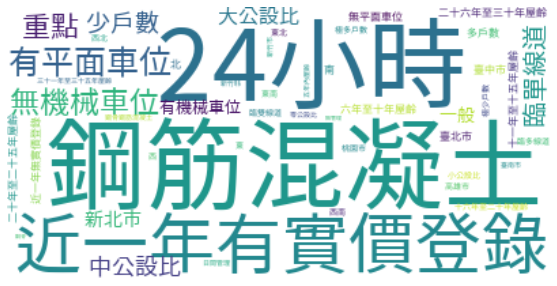

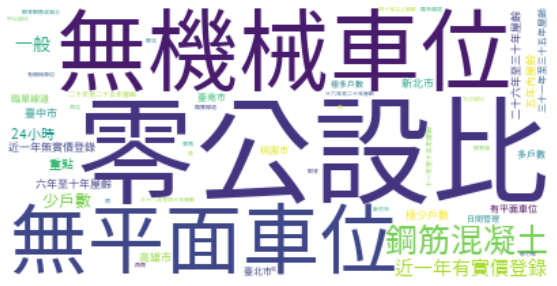

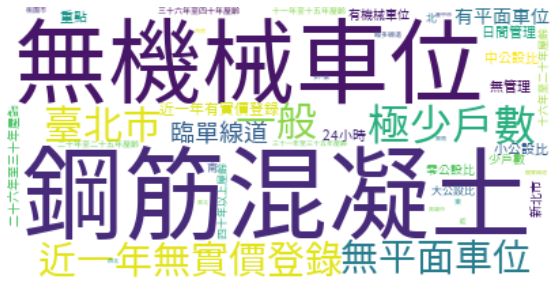

In [9]:
avg3_1 = clusterdf(cluster_avg_3,'cluster_avg_3',1)
avg3_2 = clusterdf(cluster_avg_3,'cluster_avg_3',2)
avg3_3 = clusterdf(cluster_avg_3,'cluster_avg_3',3)

# Cluster 1
print("avg3_1 size: ", len(avg3_1.index))
text_a3_1 = textList(avg3_1)
dict_a3_1 = Counter(text_a3_1)

wordcloud_a3_1 = createWordCloud(dict_a3_1)
wordcloud_a3_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_a3_1)

# Cluster 2
print("avg3_2 size: ", len(avg3_2.index))
text_a3_2 = textList(avg3_2)
dict_a3_2 = Counter(text_a3_2)

wordcloud_a3_2 = createWordCloud(dict_a3_2)
wordcloud_a3_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_a3_2)

# Cluster 3
print("avg3_3 size: ", len(avg3_3.index))
text_a3_3 = textList(avg3_3)
dict_a3_3 = Counter(text_a3_3)

wordcloud_a3_3 = createWordCloud(dict_a3_3)
wordcloud_a3_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_a3_3)

####5 clusters

avg5_1 size:  5990
avg5_2 size:  4422
avg5_3 size:  2274
avg5_4 size:  926
avg5_5 size:  4584


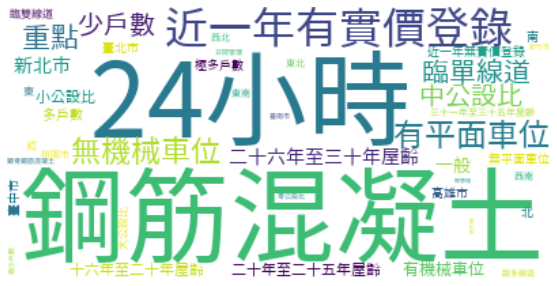

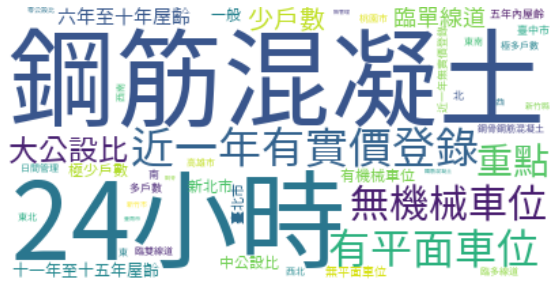

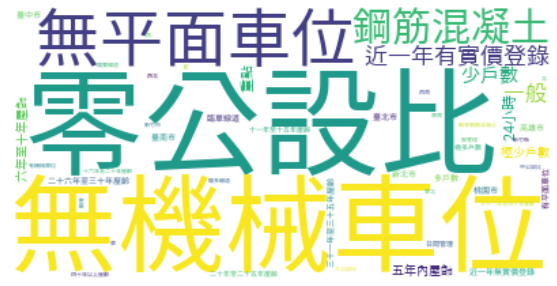

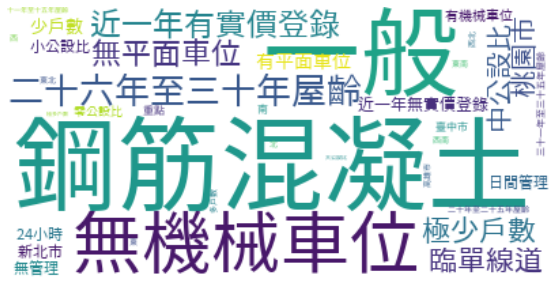

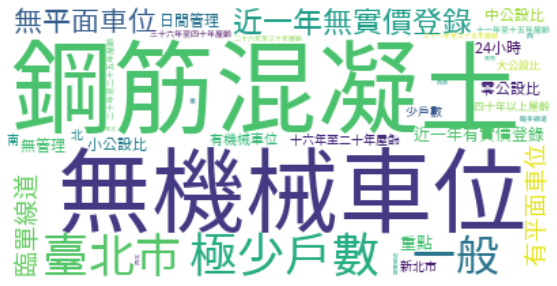

In [10]:
avg5_1 = clusterdf(cluster_avg_5,'cluster_avg_5',1)
avg5_2 = clusterdf(cluster_avg_5,'cluster_avg_5',2)
avg5_3 = clusterdf(cluster_avg_5,'cluster_avg_5',3)
avg5_4 = clusterdf(cluster_avg_5,'cluster_avg_5',4)
avg5_5 = clusterdf(cluster_avg_5,'cluster_avg_5',5)

# Cluster 1
print("avg5_1 size: ", len(avg5_1.index))
text_a5_1 = textList(avg5_1)
dict_a5_1 = Counter(text_a5_1)

wordcloud_a5_1 = createWordCloud(dict_a5_1)
wordcloud_a5_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_a5_1)

# Cluster 2
print("avg5_2 size: ", len(avg5_2.index))
text_a5_2 = textList(avg5_2)
dict_a5_2 = Counter(text_a5_2)

wordcloud_a5_2 = createWordCloud(dict_a5_2)
wordcloud_a5_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_a5_2)

# Cluster 3
print("avg5_3 size: ", len(avg5_3.index))
text_a5_3 = textList(avg5_3)
dict_a5_3 = Counter(text_a5_3)

wordcloud_a5_3 = createWordCloud(dict_a5_3)
wordcloud_a5_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_a5_3)

# Cluster 4
print("avg5_4 size: ", len(avg5_4.index))
text_a5_4 = textList(avg5_4)
dict_a5_4 = Counter(text_a5_4)

wordcloud_a5_4 = createWordCloud(dict_a5_4)
wordcloud_a5_4.words_ # check all the words with associated weights
showWordCloud(wordcloud_a5_4)

# Cluster 5
print("avg5_5 size: ", len(avg5_5.index))
text_a5_5 = textList(avg5_5)
dict_a5_5 = Counter(text_a5_5)

wordcloud_a5_5 = createWordCloud(dict_a5_5)
wordcloud_a5_5.words_ # check all the words with associated weights
showWordCloud(wordcloud_a5_5)

###**3.3 Ward Cluster**

####3 clusters

ward3_1 size:  9266
ward3_2 size:  3607
ward3_3 size:  5323


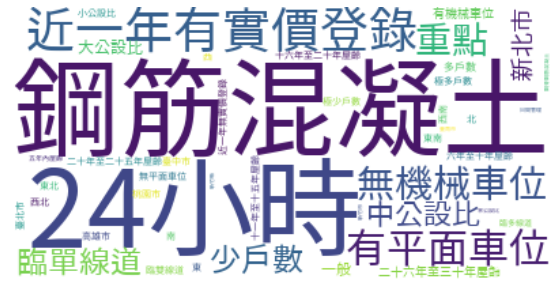

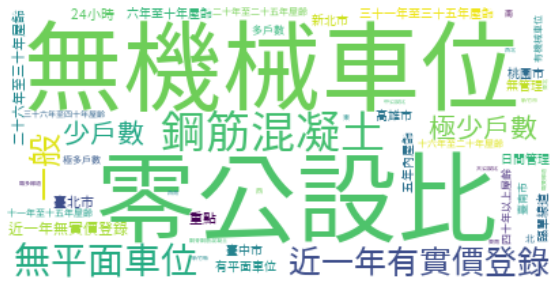

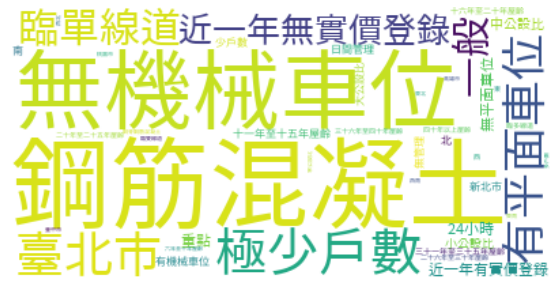

In [11]:
ward3_1 = clusterdf(cluster_ward_3,'cluster_ward_3',1)
ward3_2 = clusterdf(cluster_ward_3,'cluster_ward_3',2)
ward3_3 = clusterdf(cluster_ward_3,'cluster_ward_3',3)

# Cluster 1
print("ward3_1 size: ", len(ward3_1.index))
text_w3_1 = textList(ward3_1)
dict_w3_1 = Counter(text_w3_1)

wordcloud_w3_1 = createWordCloud(dict_w3_1)
wordcloud_w3_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_w3_1)

# Cluster 2
print("ward3_2 size: ", len(ward3_2.index))
text_w3_2 = textList(ward3_2)
dict_w3_2 = Counter(text_w3_2)

wordcloud_w3_2 = createWordCloud(dict_w3_2)
wordcloud_w3_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_w3_2)

# Cluster 3
print("ward3_3 size: ", len(ward3_3.index))
text_w3_3 = textList(ward3_3)
dict_w3_3 = Counter(text_w3_3)

wordcloud_w3_3 = createWordCloud(dict_w3_3)
wordcloud_w3_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_w3_3)


####4 clusters

ward4_1 size:  2114
ward4_2 size:  7152
ward4_3 size:  3607
ward4_4 size:  5323


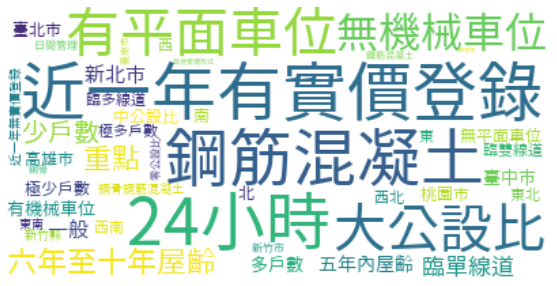

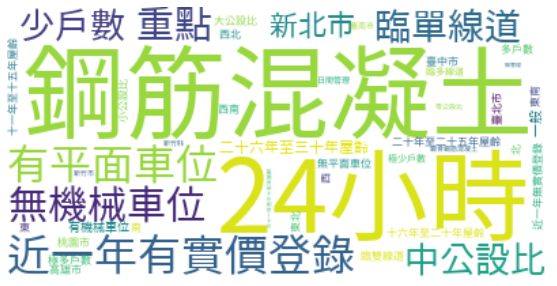

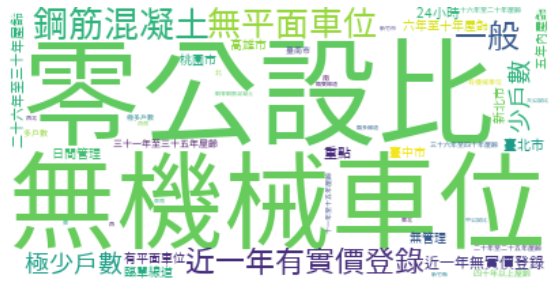

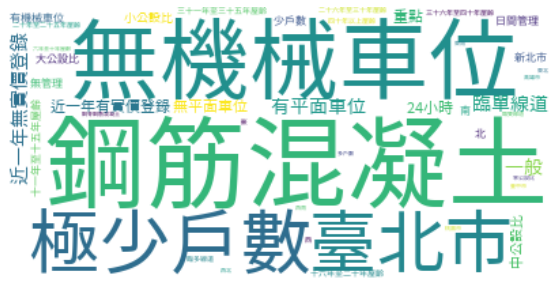

In [12]:
ward4_1 = clusterdf(cluster_ward_4,'cluster_ward_4',1)
ward4_2 = clusterdf(cluster_ward_4,'cluster_ward_4',2)
ward4_3 = clusterdf(cluster_ward_4,'cluster_ward_4',3)
ward4_4 = clusterdf(cluster_ward_4,'cluster_ward_4',4)

# Cluster 1
print("ward4_1 size: ", len(ward4_1.index))
text_w4_1 = textList(ward4_1)
dict_w4_1 = Counter(text_w4_1)

wordcloud_w4_1 = createWordCloud(dict_w4_1)
wordcloud_w4_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_1)

# Cluster 2
print("ward4_2 size: ", len(ward4_2.index))
text_w4_2 = textList(ward4_2)
dict_w4_2 = Counter(text_w4_2)

wordcloud_w4_2 = createWordCloud(dict_w4_2)
wordcloud_w4_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_2)

# Cluster 3
print("ward4_3 size: ", len(ward4_3.index))
text_w4_3 = textList(ward4_3)
dict_w4_3 = Counter(text_w4_3)

wordcloud_w4_3 = createWordCloud(dict_w4_3)
wordcloud_w4_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_3)

# Cluster 4
print("ward4_4 size: ", len(ward4_4.index))
text_w4_4 = textList(ward4_4)
dict_w4_4 = Counter(text_w4_4)

wordcloud_w4_4 = createWordCloud(dict_w4_4)
wordcloud_w4_4.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_4)


##**4. Cluster Comparison by Weights**


---



In [13]:
def feature_weight(cluster1, cluster2, cluster3):
  # df1 = pd.DataFrame(list(cluster1.words_.items()),columns=['Feature', 'cluster 1'])
  df1 = pd.DataFrame.from_dict(cluster1, orient='index').rename(columns={0:'cluster 1'})
  df2 = pd.DataFrame.from_dict(cluster2, orient='index').rename(columns={0:'cluster 2'})
  df3 = pd.DataFrame.from_dict(cluster3, orient='index').rename(columns={0:'cluster 3'})
  return pd.concat([df1, df2, df3], axis=1) # order by df1 weights
  # order by feature character
  # df = df1.join(df2, how='outer')
  # return df.join(df3, how='outer')

In [14]:
# Complete-Link
df_c3 = feature_weight(wordcloud_c3_1.words_, wordcloud_c3_2.words_, wordcloud_c3_3.words_)
df_c3.to_excel("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/pca/complete3.xlsx")
print("Complete-Link: ")
df_c3

Complete-Link: 


,cluster 1,cluster 2,cluster 3
鋼筋混凝土,1.000000,1.000000,0.979933
24小時,0.992325,0.386388,0.324972
近一年有實價登錄,0.953427,0.417738,0.669732
有平面車位,0.903806,0.491426,0.232441
無機械車位,0.810029,0.779475,1.000000
重點,0.786480,0.399518,0.217391
臨單線道,0.618902,0.536710,0.291527
少戶數,0.599769,0.212219,0.451505
中公設比,0.484966,0.342980,0.162207
大公設比,0.367746,0.257771,0.051561


In [15]:
# Group Average
df_a3 = feature_weight(wordcloud_a3_1.words_, wordcloud_a3_2.words_, wordcloud_a3_3.words_)
df_a3.to_excel("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/pca/average3.xlsx")
print("Group Average: ")
df_a3

Group Average: 


,cluster 1,cluster 2,cluster 3
鋼筋混凝土,1.000000,0.854185,1.000000
24小時,0.988784,0.344284,0.336200
近一年有實價登錄,0.920656,0.841584,0.438647
有平面車位,0.890539,0.158416,0.447057
無機械車位,0.789905,0.989649,0.840596
重點,0.750545,0.307831,0.351873
臨單線道,0.621560,0.122862,0.511850
少戶數,0.584796,0.569757,0.232989
中公設比,0.488317,0.014851,0.332760
大公設比,0.400769,0.005401,0.147936


In [16]:
# Ward
df_w3 = feature_weight(wordcloud_w3_1.words_, wordcloud_w3_2.words_, wordcloud_w3_3.words_)
df_w3.to_excel("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/pca/ward3.xlsx")
print("Ward: ")
df_w3

Ward: 


,cluster 1,cluster 2,cluster 3
鋼筋混凝土,1.000000,0.927053,1.000000
24小時,0.994312,0.306556,0.487815
近一年有實價登錄,0.944045,0.721500,0.490412
有平面車位,0.898073,0.169817,0.590292
無機械車位,0.796842,0.999114,0.790252
重點,0.742396,0.276728,0.483420
臨單線道,0.627235,0.179858,0.584099
少戶數,0.613768,0.455109,0.257291
中公設比,0.516020,0.028352,0.386536
新北市,0.379731,0.217956,0.207751
